

# Investigate a Dataset - No Show Appointments: 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset information
No Show appointment is a dataset about over 100,000 medical appointments of patients in Brazil. The dataset provides information about the demography of the patients which included age,sex,location, wether the patients were enrolled in a brazillian welfare programme or not. Also, the date on which the appointment was made as well as the appointment date was available in the datasets. Medical conditions such as being hypertensive, diabetic or diabled as well as social history of patients(alcohol consumption) were included in the dataset to establish or confirm the realtionship of all these varibales to a patient showing up for their clinic appointments.'No-show' column enteries are denoted with "Yes" which mean a client did not show up and "No" for a client who showed up for their appointment.



## Question(s) for Analysis

1. Did youths miss their clinic appointments the most?
2. Does being enrolled in the welfare program encourage showing up for clinic appointment?


In [51]:
#  import statements for all of the packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline




In [52]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling


In [53]:
# Load dataset and check information about the dataset
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [54]:
# check for mising values
df.isnull().sum()



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [55]:
# check for duplicated entries
df.duplicated().sum()

0

There are 14 columns with 110527 instances of appointments, 
There are no missing value values,there are no duplicated values
however there are some columns with wrong data types which are ScheduledDay and AppointmentDay which were assigned string instead of Datetime


In [56]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



# Data Cleaning

 

1.This dataset seems to be largely clean except for the wrong data types that were assigned to ScheduledDay and AppointmentDay, however, to answer questions raised, i would not be needing those two columns, hence, i will drop them.
2.Also the minimum age is -1 which is illogical. so i further check the dataset to see how many rows with -1

In [57]:
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one row with an age of -1, its advisable to drop the row in question


In [58]:
df.drop(df[df.Age== -1].index, inplace = True)

confirm drop of -1 age

In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [60]:
# drop columns not to be used; schedule day, appointment day. neighbourhood columns

df.drop(['ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace= True)

# confirm drop

df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>## Demographic distributions

>>### Age distribution

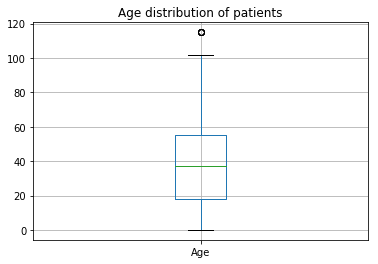

In [61]:
# Age distribution
df.boxplot(column='Age');
plt.title('Age distribution of patients');

The boxplot above shows the age distribution of the patients who booked appointmernts with their median age being 38 years and the oldest being an outlier,118 years. Few patients fall withing the first 25%(between the ages of 0-19 years) of the sample while a significant number of the patients are between thae ages 58-100 years.

>>### Sex distribution

In [62]:
sex_count = df.groupby('Gender')['Gender'].value_counts()
sex_count


Gender  Gender
F       F         71839
M       M         38687
Name: Gender, dtype: int64

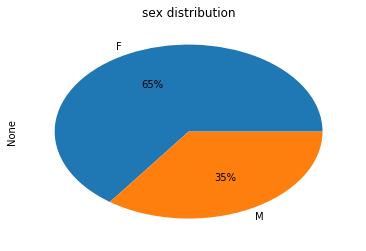

In [63]:
# sex distribution
# using a pie chart to compare the number of patients who were males to females
df.groupby(['Gender']).size().plot(kind='pie', autopct='%1.0f%%',title='sex distribution');

from the pie chart above, there are more females(65%) compared to males(35%) who booked clinic appointments within that period

>## Answers to questions raised

create a function called 'percent', that will return a 'percentage' value round to a whole number. In answering the questions raised, it will be comprehensible to have categorical data such age, sex, scholarship, to be expressed in comparison to the dependent variable no show, i.e the number of patients who missed or showed for their appointment as a percentage of the total number of patients per category 

In [64]:
def percent(show,total):
    percentage = round((show*100)/total)
    return percentage

>>## Q1.Did youths miss their clinic appointments the most?

For the age column to have an analytic importance, it is necessary to view missed appointment in the context of age categories such as children, youth,adults, and seniors.

Dividing ages into Children(0-14),youth(15-24),adults(25-64),seniors(65 and above).
This will be done suing the bin function.

In [65]:
bin_edges= [0,14,24,64,120]

In [66]:
bin_names = ['Children' ,'Youth' ,'Adults','Seniors']

In [67]:
df['age_category']= pd.cut(df.Age, bin_edges, labels=bin_names)

# the categorization will be saved in a new column called "age_category"

In [68]:
# confirm new "age_catgory column"
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category
0,2.987250e+13,5642903,F,62,0,1,0,0,0,0,No,Adults
1,5.589978e+14,5642503,M,56,0,0,0,0,0,0,No,Adults
2,4.262962e+12,5642549,F,62,0,0,0,0,0,0,No,Adults
3,8.679512e+11,5642828,F,8,0,0,0,0,0,0,No,Children
4,8.841186e+12,5642494,F,56,0,1,1,0,0,0,No,Adults


In [70]:
#group by age categories and extract the numbers of patients who missed or didnt miss their appointments using '.value_counts()' and save into agegroup
agegrp= df.groupby('age_category')['No-show'].value_counts()
agegrp

age_category  No-show
Children      No         15431
              Yes         4287
Youth         No         10470
              Yes         3540
Adults        No         47237
              Yes        11620
Seniors       No         12169
              Yes         2233
Name: No-show, dtype: int64

In [71]:
# get the total number of patients in each age category using counts() and save into age_count
age_count= df.groupby('age_category')['No-show'].count()
age_count

age_category
Children    19718
Youth       14010
Adults      58857
Seniors     14402
Name: No-show, dtype: int64

In [72]:
# using the 'percent' function created earlier, return the percentage of patients who either missed or showed up for their appointments per age category

age_percent= percent(agegrp,age_count)
age_percent

age_category  No-show
Children      No         78.0
              Yes        22.0
Youth         No         75.0
              Yes        25.0
Adults        No         80.0
              Yes        20.0
Seniors       No         84.0
              Yes        16.0
Name: No-show, dtype: float64

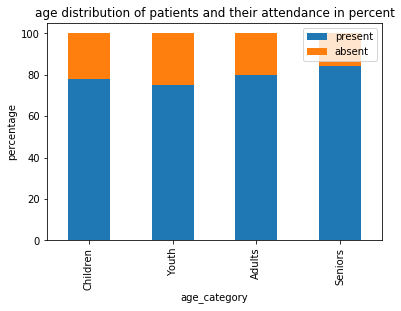

In [73]:
#plot bar chart for each age category showing the number who attended or not


age_percent.unstack().plot(kind='bar', stacked= True);
plt.legend(['present','absent']);
plt.ylabel('percentage');
plt.title('age distribution of patients and their attendance in percent');

Overall, there is no significant difference in the number patients who missed or showed up for their clinic visits across different age groups. However,Seniors missed appointments the least compared to other age groups and the youths missed their clinc visits the most.

>>## Q2. Does being enrolled in the welfare program encourage showing up for clinic appointment?


In [74]:
#group absentees and attendees into categories of having scholarships or not

scholarshipcount= df.groupby('Scholarship')["No-show"].value_counts()
scholarshipcount

Scholarship  No-show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

In [75]:
#get the total number of patients who have scholarships adn those who do not

total_scholarships = df.groupby('Scholarship')["No-show"].count()
total_scholarships

Scholarship
0    99665
1    10861
Name: No-show, dtype: int64

In [76]:
#using the percent function again, we get the percentage of scholarship beneficiaries who either missed or showed up for  their clinic visits


scholarship_percent = percent(scholarshipcount,total_scholarships)
scholarship_percent


Scholarship  No-show
0            No         80.0
             Yes        20.0
1            No         76.0
             Yes        24.0
Name: No-show, dtype: float64

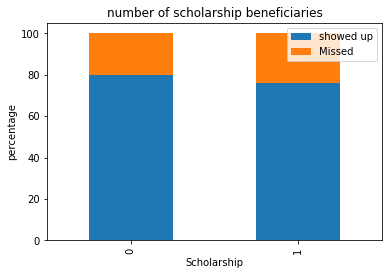

In [77]:
#plot a stacked bar chart for enrolles who missed or attended
# plot on the same chart non enrolles of the scholarship who missed or attended
scholarship_percent.unstack().plot(kind='bar', stacked=True );
plt.legend(['showed up','Missed']);
plt.ylabel('percentage');
plt.title('number of scholarship beneficiaries');

from this dataset and the period it captures, overall, there is no significant difference between beneficiaries and non beneficiaries showing up for clincic appointments. However,non beneficiaries missed their appoinments less compared to beneficiaries

<a id='conclusions'></a>
## Conclusions
> **Findings**: 
1.After grouping ages into categories, adults between the age of 25years t0 65 kept up with their appointments and also had the highest number of people missing apppointments. Seniors missed appointments the least compared to other age groups.
2. Also, the numbers of un enrolled patients was more than the number of enrolled patients, and the number of people who missed their appointments was more in the unenrolled group of patients.
>
>**Limitations**: 
1. The is no complete documentation for the datasets. There are no context to work with, for instance, the handicap and text message columns were not explained, so its diffciult to  determine what level of disability might have a relationship with the dependent variable. 
2.Also, you cannot establish a pattern of attending appointments as there are all unique patients with only one scheduled date and appointment date. There are no previous dates of appointment to compare with to establish a pattern



In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0